In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

C:\Users\pavle.dimic\AppData\Local\Temp\ipykernel_21788\209401310.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


### All coins

In [2]:
coins = pd.read_csv('../data/coins.csv', parse_dates=['Date'])
coins = coins.set_index('Date')
tickers = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'XMR']
coins.columns = [col.replace('-USD', '') for col in coins.columns]

btc = coins[['BTC']].copy()

coins = coins.loc[:, tickers].dropna()

coins

,BTC,ETH,LTC,XRP,ADA,XMR
Date,,,,,,
2017-11-09,7143.580078,320.884003,64.269699,0.217488,0.032053,120.779999
2017-11-10,6618.140137,299.252991,59.260101,0.206483,0.027119,105.585999
2017-11-11,6357.600098,314.681000,62.303299,0.210430,0.027437,119.615997
2017-11-12,5950.069824,307.907990,59.005402,0.197339,0.023977,123.856003
2017-11-13,6559.490234,316.716003,61.396500,0.203442,0.025808,123.402000
...,...,...,...,...,...,...
2023-12-27,43442.855469,2378.739990,75.850304,0.634856,0.633535,175.491974
2023-12-28,42627.855469,2347.566162,76.722328,0.634998,0.617422,175.264069
2023-12-29,42099.402344,2300.690674,73.404144,0.623402,0.608494,166.700546


### Normalizacija cena coina

In [3]:
norm_coins = coins.div(coins.iloc[0]).mul(100)

norm_coins.head()

,BTC,ETH,LTC,XRP,ADA,XMR
Date,,,,,,
2017-11-09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-11-10,92.644585,93.258931,92.205351,94.939951,84.606740,87.420102
2017-11-11,88.997394,98.066902,96.940393,96.754759,85.598847,99.036263
2017-11-12,83.292547,95.956167,91.809052,90.735578,74.804228,102.546783
2017-11-13,91.823570,98.701088,95.529465,93.541714,80.516638,102.170891


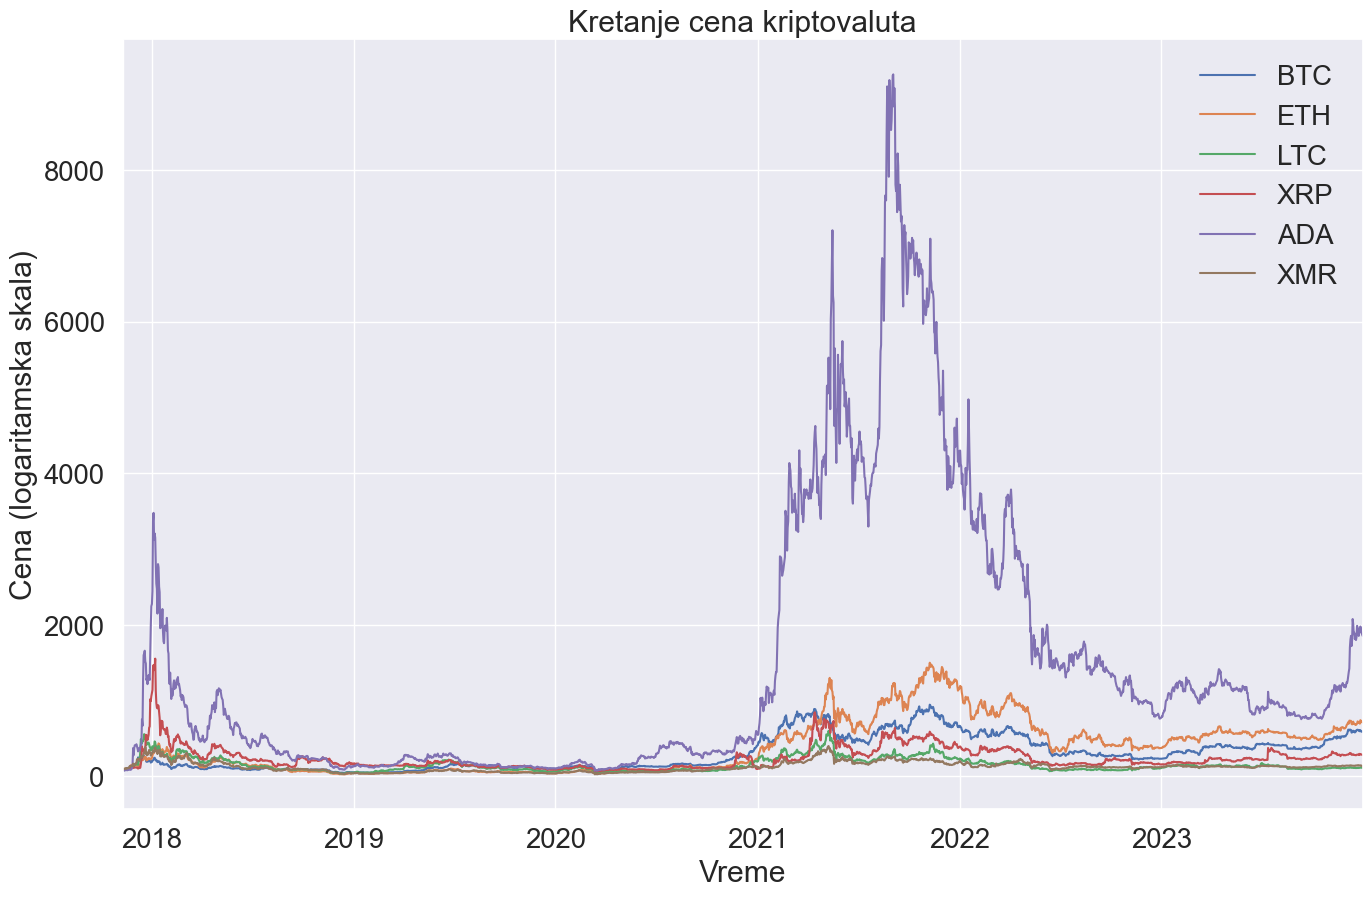

In [17]:
norm_coins.plot(figsize=(16, 10))
# plt.yscale('log')
plt.legend()

# Postavljanje naslova i oznaka osa
plt.title('Kretanje cena kriptovaluta')
plt.xlabel('Vreme')
plt.ylabel('Cena (logaritamska skala)')

# Povećavanje margina radi bolje čitljivosti
plt.margins(x=0)


plt.show()

### Performans kriptovaluta

In [5]:
ret = coins.pct_change().dropna()
ret

,BTC,ETH,LTC,XRP,ADA,XMR
Date,,,,,,
2017-11-10,-0.073554,-0.067411,-0.077946,-0.050600,-0.153933,-0.125799
2017-11-11,-0.039368,0.051555,0.051353,0.019115,0.011726,0.132877
2017-11-12,-0.064101,-0.021523,-0.052933,-0.062211,-0.126107,0.035447
2017-11-13,0.102422,0.028606,0.040523,0.030927,0.076365,-0.003666
2017-11-14,0.011626,0.066037,0.020899,0.031375,0.016352,-0.008501
...,...,...,...,...,...,...
2023-12-27,0.021694,0.065999,0.036907,0.020064,0.040631,0.008036
2023-12-28,-0.018760,-0.013105,0.011497,0.000224,-0.025434,-0.001299
2023-12-29,-0.012397,-0.019968,-0.043249,-0.018262,-0.014460,-0.048861


In [6]:
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary["mean"] = summary["mean"]*365
summary["std"] = summary["std"] * np.sqrt(365)
summary

,mean,std
BTC,0.550775,0.719531
ETH,0.735164,0.904911
LTC,0.522226,1.008288
XRP,0.859321,1.226870
ADA,1.242025,1.332604
XMR,0.518642,0.959733


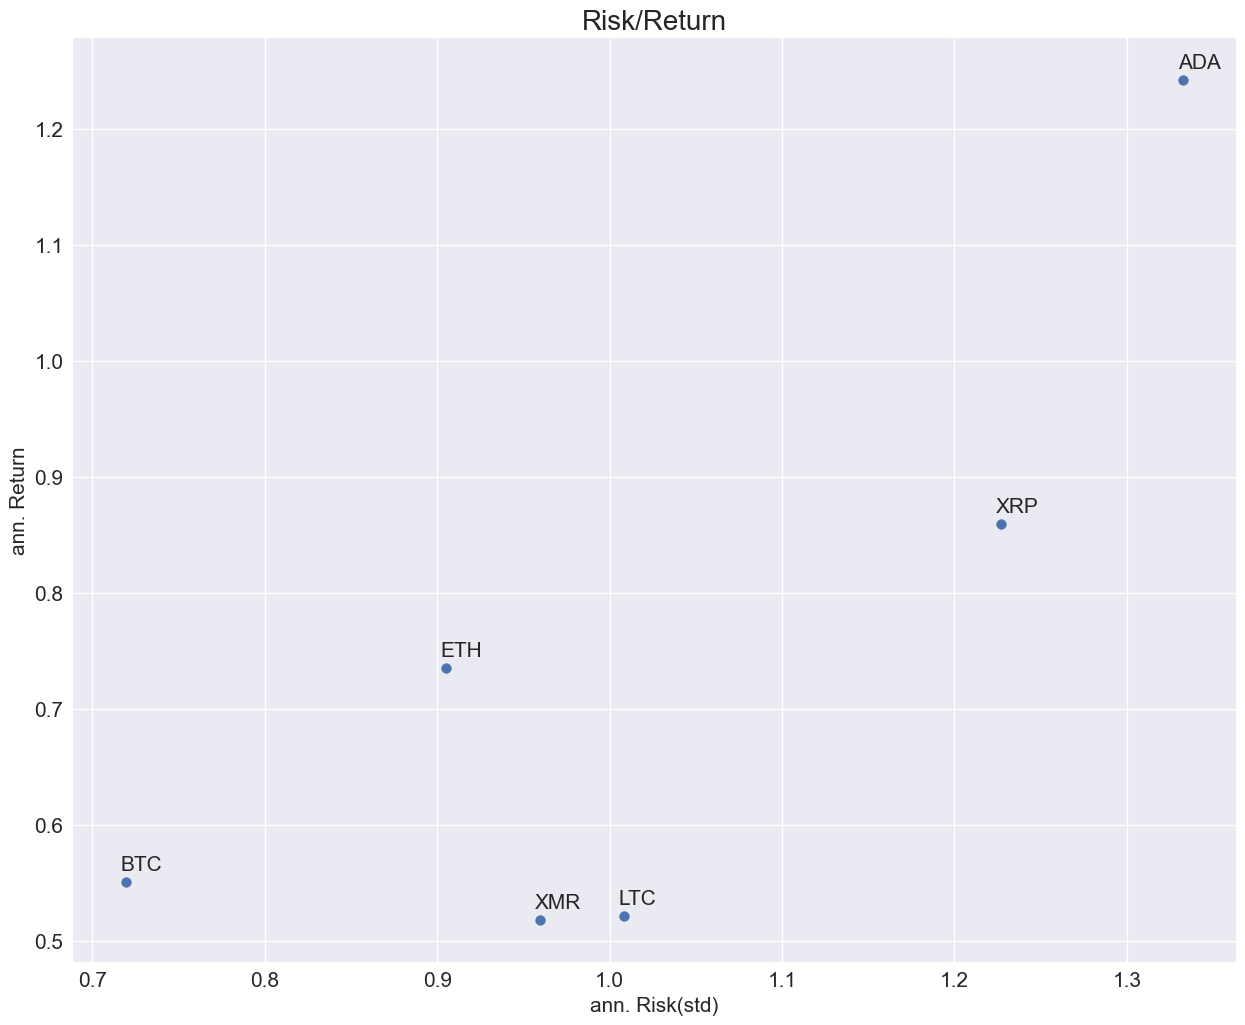

In [7]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]-0.003, summary.loc[i, "mean"]+0.010), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

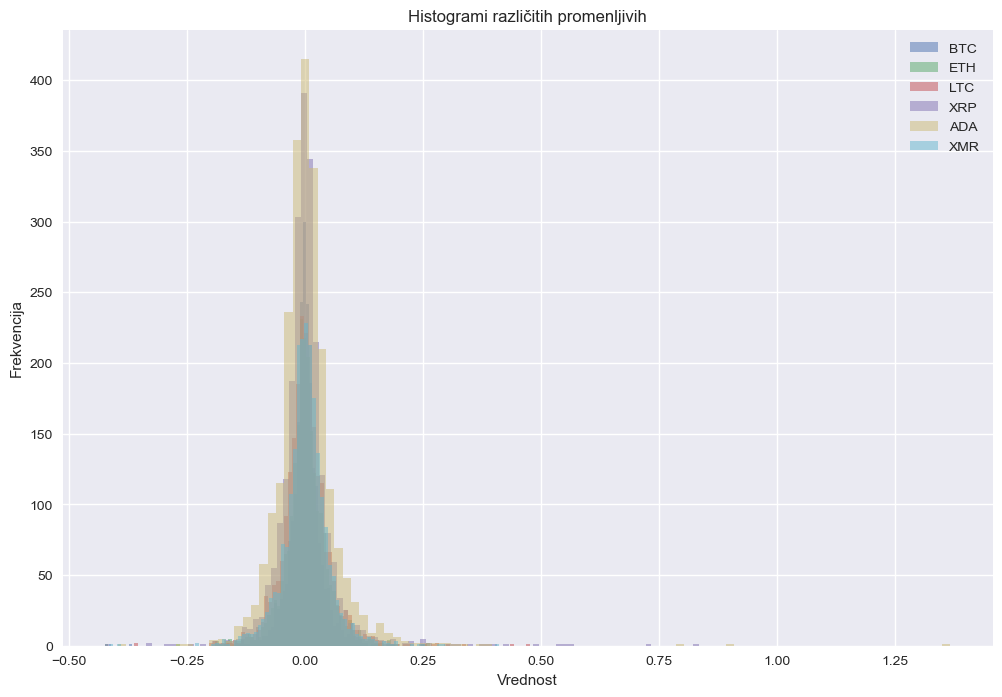

In [8]:
# Postavljanje parametara za subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Crtanje histograma za svaki stupac u DataFrame-u
for col in ret.columns:
    ax.hist(ret[col], bins=100, alpha=0.5, label=col)

# Postavljanje naslova i oznaka osa
ax.set_title('Histogrami različitih promenljivih')
ax.set_xlabel('Vrednost')
ax.set_ylabel('Frekvencija')

# Dodavanje legende
ax.legend()

# Prikazivanje grafika
plt.show()

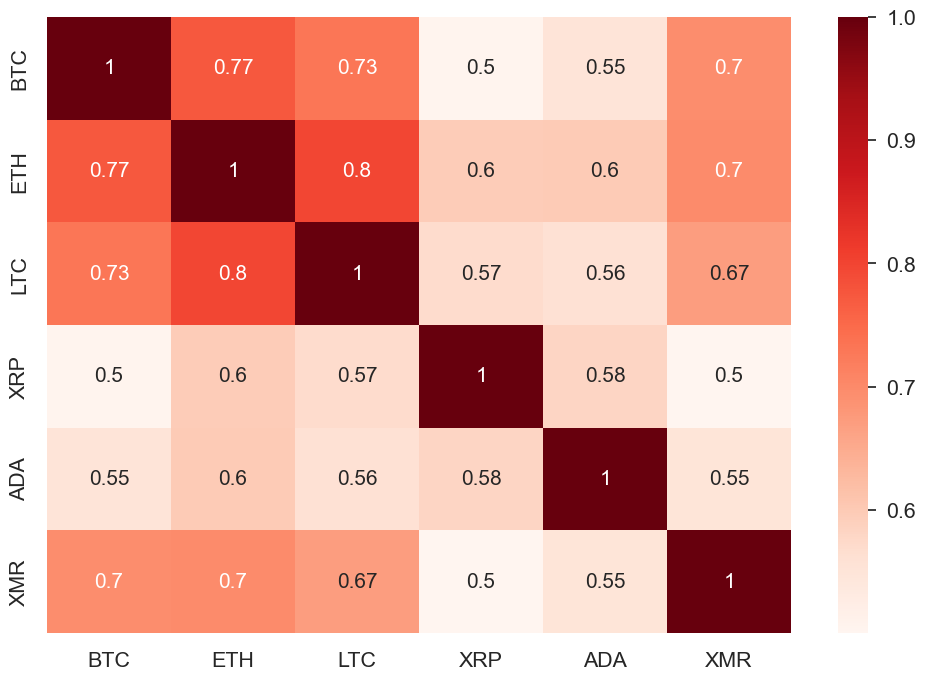

In [9]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws={"size":15}, vmax = 1)
plt.show()

### Return Triangle

In [10]:
annual = btc.resample('Y', kind='period').last()
annual["Return"] = np.log(annual.BTC / annual.BTC.shift())
annual = annual.dropna()

years = annual.index.size
windows = [year for year in range(9, 0, -1)]

for year in windows:
    annual["{}Y".format(year)] = np.exp(year * annual.Return.rolling(year).mean()) * 100
absolute_triangle = annual.drop(columns = ["BTC", "Return"])


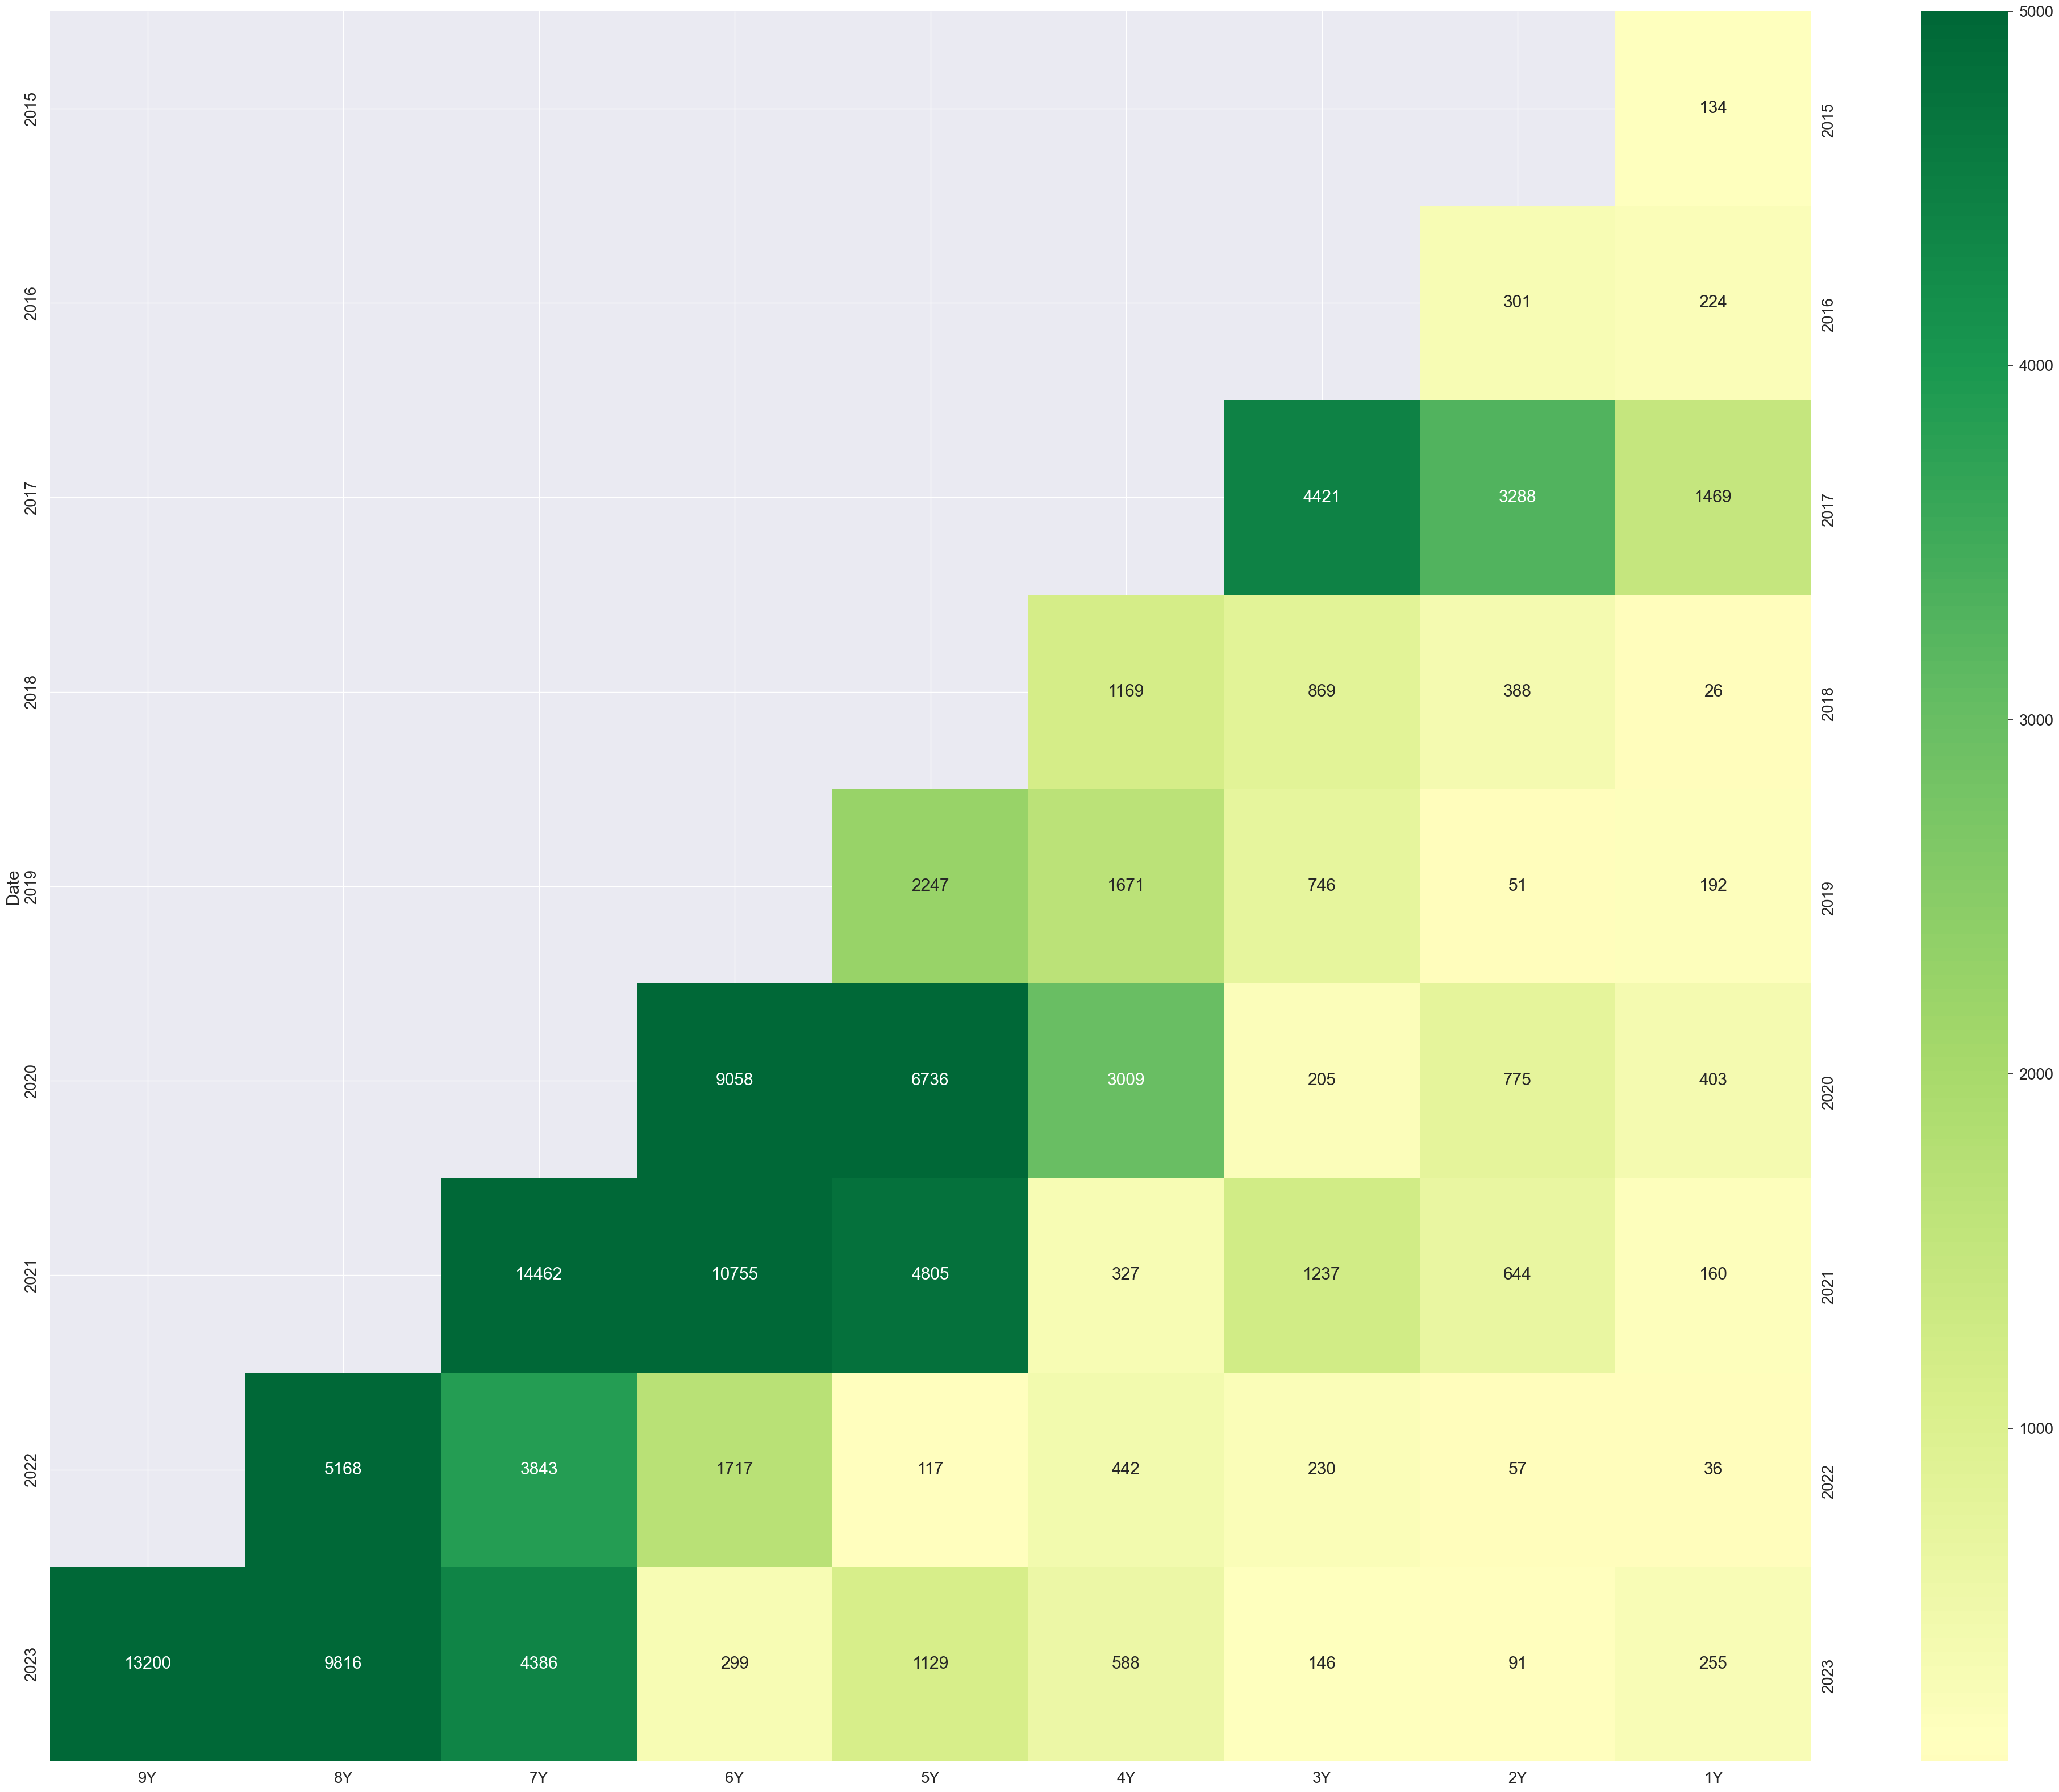

In [16]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(absolute_triangle, annot = True, fmt = ".0f",  cmap = "RdYlGn", 
            vmin =60, vmax = 5000, center = 100)
plt.tick_params(axis = "y", labelright =True)
plt.show()

In [12]:
annual = btc.resample('Y', kind='period').last()
annual["Return"] = np.log(annual.BTC / annual.BTC.shift())
annual = annual.dropna()

years = annual.index.size
windows = [year for year in range(9, 0, -1)]

for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

percent_triangle = annual.drop(columns = ["BTC", "Return"])


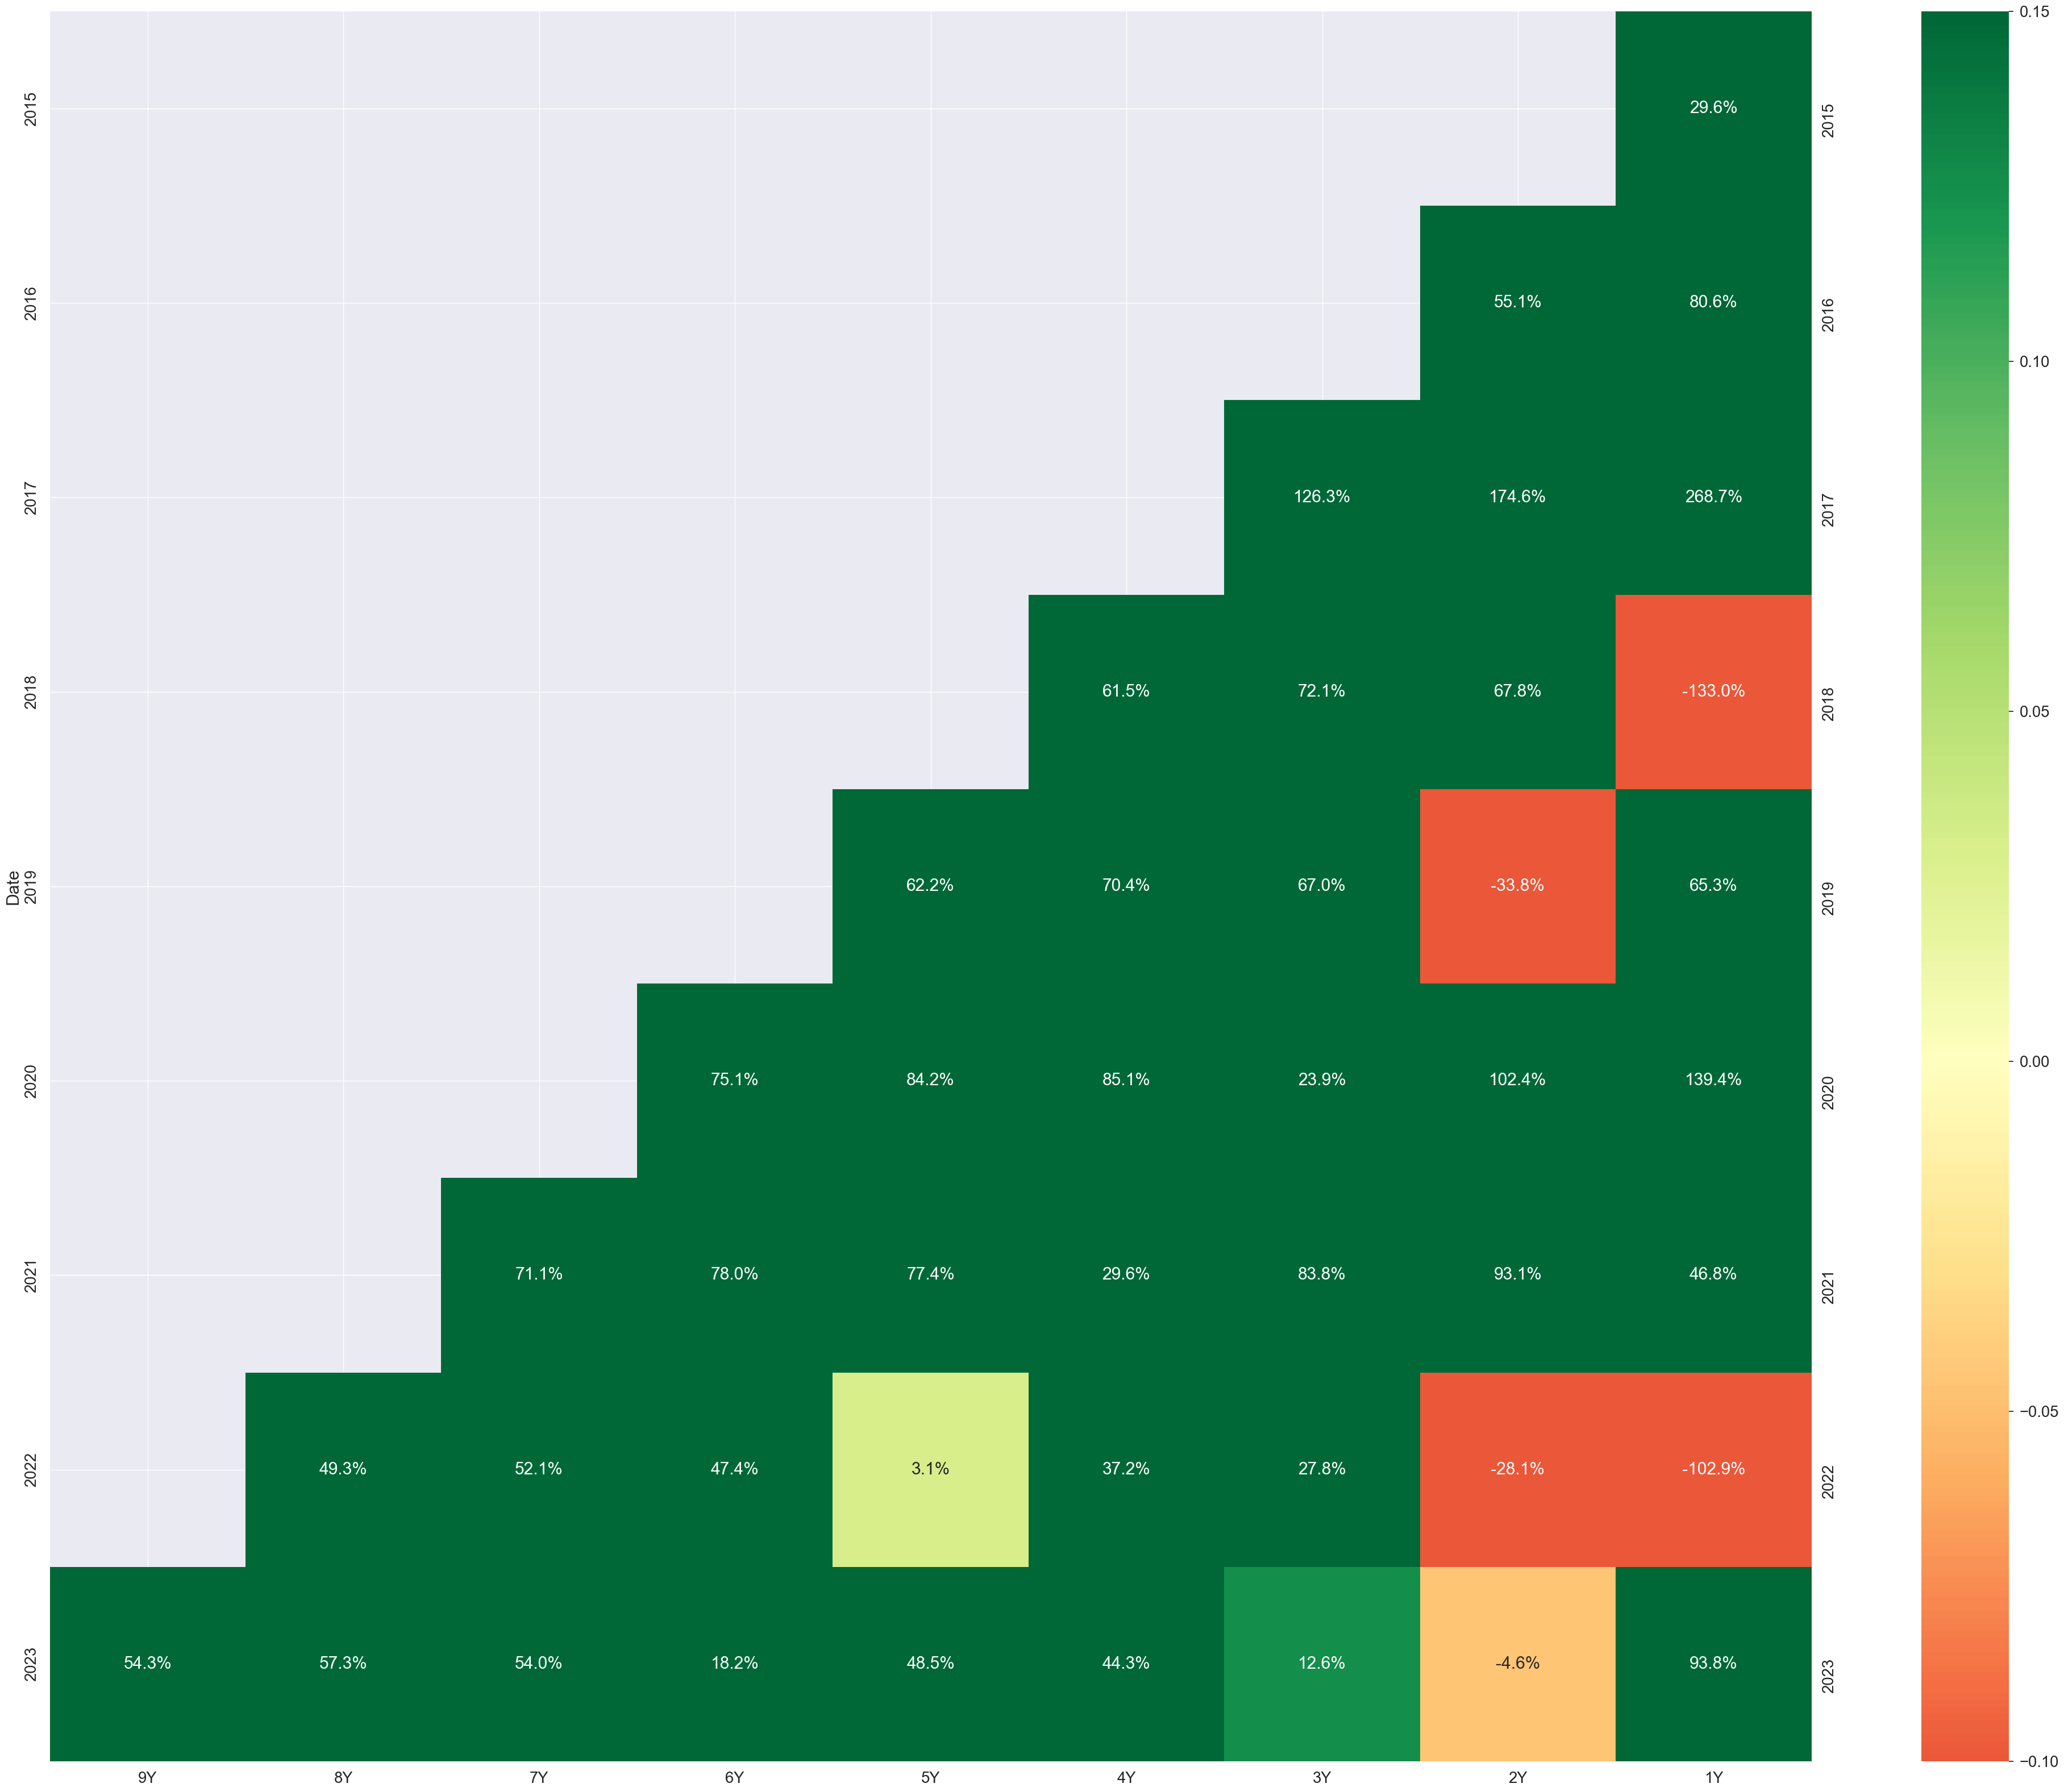

In [13]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(percent_triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()